# KET Apple Marketing Team

## Introduction
The South by Southwest (SXSW) Conference & Festivals annually draw tech enthusiasts, industry professionals, and innovators from around the globe to Austin, Texas. Among the myriad discussions, keynotes, and showcases, tech giants like Apple and Google often seize the spotlight, using SXSW as a stage to unveil new products, announce software updates, and tease upcoming changes to their services.

In this notebook, we embark on an exploration of sentiment analysis within the context of SXSW, with a specific focus on tweets related to Apple. As one of the most influential tech companies worldwide, Apple's presence at SXSW invariably sparks conversations, excitement, and sometimes criticism among attendees and online communities.

Throughout the conference, Apple typically leverages the platform to make significant announcements, ranging from the release of new hardware like iPhones and iPads to software updates for its operating systems such as iOS and macOS. Additionally, the company often uses SXSW as an opportunity to showcase innovative features, tease upcoming products, and provide insights into its future direction.

In this analysis, we aim to uncover insights into the sentiment surrounding Apple's announcements, product releases, and service changes during the SXSW conference, particularly focusing on negative sentiment. By delving into negative tweets, we seek to identify areas of concern, critique, or dissatisfaction expressed by attendees and online communities regarding Apple's offerings and presentations. Below are the questions we will be providing insights for:

#### 1. What aspects of Apple products do users frequently critique?
#### 2. What is a common point of frustration for consumers regarding the performance of Apple devices?
#### 3. What specific concerns do users raise regarding aesthetics and user interface?

# EDA
We start our analysis by importing the relevant packages for our analysis and then reading in our data using pandas.

In [2780]:
#Importing packages 
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
import warnings 
# Filter warnings
warnings.filterwarnings("ignore")

In [2781]:
# Read in our Data
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='latin1')
# Set pandas display options to show full text without truncation
pd.set_option('display.max_colwidth', None)

We take a look at our data. We can see that there are three columns contain tweets, emotions in the tweet directed at, and the type of emotions.

In [2782]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [2783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [2784]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [2785]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

## Renaming Columns
The three columns that the dataset came with where pretty lengthy. We decided to rename them for better understanding throughout our analysis.

In [2786]:
# Rename the column
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'}, inplace=True)
df.rename(columns={'emotion_in_tweet_is_directed_at': 'Brand'}, inplace=True)
df.rename(columns={'tweet_text': 'Tweets'}, inplace=True)

In [2787]:
df.head()

,Tweets,Brand,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


Now we have renamed each column. We now look at the 'Brand' column and we see that the objects within this column are either Apple related or Google related. We will now map these objects into two objects 'Apple' and 'Google' that corresponds correctly. 

In [2788]:
df['Brand'].value_counts()

Brand
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [2789]:
# Defined the mapping for replacement
mapping = {
    'iPad': 'Apple',
    'Apple': 'Apple',
    'iPad or iPhone App': 'Apple',
    'iPhone': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Other Google product or service': 'Google',
    'Android App': 'Google',
    'Android': 'Google'
}

# Replaced the values in the column
df['Brand'] = df['Brand'].replace(mapping)

# Checked the updated value counts
print(df['Brand'].value_counts())


Brand
Apple     2409
Google     882
Name: count, dtype: int64


## Filtering For Apple Only
We mapped everything in the 'Brand' column to its respective company. Now we will filter our dataframe to just focus on Apple.

In [2790]:
# Filter the DataFrame for 'Apple' sentiment
Apple_df = df[(df['Brand'] == 'Apple')]

We now filtered our dataframe to just Apple. We check to make sure there are no n/a values in our data so that we can continue our analysis.

In [2791]:
Apple_df.isna().sum()

Tweets       0
Brand        0
Sentiment    0
dtype: int64

We now look at our 'Sentiment' column. We see that there are four different types of sentiment. We are only focused on Negative and Positive sentiments for our analysis.

In [2792]:
Apple_df['Sentiment'].value_counts()

Sentiment
Positive emotion                      1949
Negative emotion                       388
No emotion toward brand or product      65
I can't tell                             7
Name: count, dtype: int64

## Replacing Sentiment Names to better understand
We notice that the 'Sentiment' names can simplified to better understand. We replaced the names and also got rid of the two 'Sentiments' we did not need for our analysis.

In [2793]:
Apple_df['Sentiment'] = Apple_df['Sentiment'].replace({
    'Negative emotion': 'Negative',
    'No emotion toward brand or product': 'Neutral',
    'Positive emotion': 'Positive'
})
Apple_df = Apple_df[Apple_df['Sentiment'] != "I can't tell"]
Apple_df = Apple_df[Apple_df['Sentiment'] != 'Neutral']

In [2794]:
Apple_df['Sentiment'].value_counts()

Sentiment
Positive    1949
Negative     388
Name: count, dtype: int64

## Duplicates 
We have now filtered our data to just Positve and Negative sentiments. We then check for duplicated in our data and drop them.

In [2795]:
len(Apple_df[Apple_df.duplicated()])

5

In [2796]:
Apple_df[Apple_df.duplicated()]

,Tweets,Brand,Sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive
2559,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive
4897,"Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!",Apple,Positive
8483,I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone,Apple,Negative
8747,Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?,Apple,Positive


In [2797]:
# Dropping Duplicates
Apple_df.drop_duplicates(keep='first', inplace=True)
Apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2332 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweets     2332 non-null   object
 1   Brand      2332 non-null   object
 2   Sentiment  2332 non-null   object
dtypes: object(3)
memory usage: 72.9+ KB


In [2798]:
Apple_df['Sentiment'].value_counts()

Sentiment
Positive    1945
Negative     387
Name: count, dtype: int64

## Percentages of Positive and Negative Sentiments
Now that our data is filtered. We can now look at the percentage of Positve and Negative sentiments.

In [2759]:
Apple_sentiment = pd.DataFrame(Apple_df['Sentiment'].value_counts(normalize=True)).reset_index()
Apple_sentiment.columns=['Sentiment', 'Percentage']
display(Apple_sentiment)
Apple_sentiment.sort_values('Percentage', ascending=True, inplace=True)

,Sentiment,Percentage
0,Positive,0.834048
1,Negative,0.165952


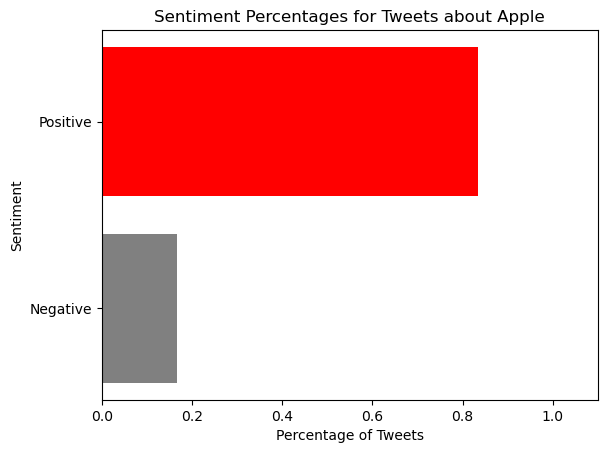

In [2760]:
fig, ax = plt.subplots()
ax.barh(Apple_sentiment['Sentiment'], Apple_sentiment['Percentage'], 
        color=['Grey', 'Red'])
ax.set_xlim(0, 1.1)
ax.set_xlabel('Percentage of Tweets')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment Percentages for Tweets about Apple');

As we can see above most tweets that were about Apple were positive (83.4%) while 16.5% of tweets were negative. This is helpful to see that it shows how Apple as a company is viewed in a positive way. However, this does't show us what products do users frequently critique, point of frustration, or concerns users raise regarding aesthetics and user interface. We can get a better understanding by conducting a wordcloud to see which words are associated with negative tweets about Apple.

# Apple Negative Tweets
We will now look at the frequency of some words associated with negative tweets. First we must do some preprocessing of the tweets.

In [2761]:
#parsing negative tweets into new df
Apple_df_neg = Apple_df[Apple_df['Sentiment']=='Negative']
#verifying that positive tweets have been removed
Apple_df_neg['Sentiment'].value_counts()

Sentiment
Negative    387
Name: count, dtype: int64

In [2762]:
#parsing tweets into a list
corpus_neg = Apple_df_neg['Tweets'].to_list()
corpus_neg[:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 'attending @mention iPad design headaches #sxsw {link}',
 "What !?!? @mention  #SXSW does not provide iPhone chargers?!?  I've changed my mind about going next year!"]

## TweetTokenizer
To tokenizine the tweets we will use the TweetTokenizer. 

In [2763]:
from nltk import TweetTokenizer


#functionize tokenization of tweets
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    """Function returns tokens based on a corpus passed in. The corpus will be broken 
    down into tokens based on TweetTokenizer from the nltk package.
    -------------------------------
    Arguments:
    corpus: the collection of words to be tokenized in a corpus format.
    preserve_case: whether to keep the upper case letters in the words as upper case
    stip_handles: whether to remove twitter handles"""
    
    tokenizer = TweetTokenizer(preserve_case=preserve_case, 
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [2764]:
#tokenize negative tweets
tokens_neg = tokenize_tweets(corpus_neg)

In [2765]:
#displaying 10 most common tokens
from nltk import FreqDist
from nltk.probability import FreqDist
freq = FreqDist(tokens_neg)
freq.most_common(10)

[(',', 516),
 ('.', 409),
 ('#sxsw', 386),
 ('the', 227),
 ('to', 173),
 ('ipad', 165),
 ('iphone', 133),
 ('is', 117),
 ('i', 116),
 ('"', 115)]

## Lemmatization

In [2766]:
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')

#functionize lemmatization of tokens
def lemmatize_tokens(tokens_list):
    """Function lemmatizes tokens list that is passed in by using 
    WordNetLemmatizer and returns lemmatized tokens.
    -------------------------------
    Arguments:
    tokens_list: a tokens list
    """
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

In [2767]:
#lemmatizing positive tweet tokens
tokens_neg_lemm = lemmatize_tokens(tokens_neg)

In [2768]:
#displaying most common 10 tokens

freq = FreqDist(tokens_neg_lemm)
freq.most_common(10)

[(',', 516),
 ('.', 409),
 ('#sxsw', 386),
 ('the', 227),
 ('to', 173),
 ('ipad', 165),
 ('a', 139),
 ('iphone', 133),
 ('is', 117),
 ('i', 116)]

As we can see above that the top 10 tokens still contain alot of punctuation since we haven't removed them yet. We will now remove those and see our updated list.

## Stop Word/Punctuation Removal

In [2769]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

#adding additional characters and empty string to stop words
additional_punc = ['“','”','...',"''",'’','``','', '#sxsw', '#sxswi', 'sxsw', 'link', 'rt']
stopwords_list += additional_punc


In [2770]:
#functionizing removal of stop words
def remove_stop(tokens, stop_list=stopwords_list):
    
    """Function removes stop words from a given tokens list based on a 
    stop word list.
    -------------------------------
    Arguments:
    tokens: a tokens list
    stop_list: a list containing stop words to be removed from tokens"""
    
    #encoding/decoding tokens to eliminate unrecognized symbols and 
    #eliminating external links
    tokens_stopped = [word.encode('ascii','ignore').decode() 
                      for word in tokens 
                      if (word not in stopwords_list) & 
                      (word.startswith('http') == False)]
    
    return tokens_stopped

In [2771]:
#removing stop words from lemmatized tokens
tokens_neg_ls = remove_stop(tokens_neg_lemm)

In [2772]:
#displaying most common 50 tokens

freq = FreqDist(tokens_neg_ls)
freq.most_common(50)

[('ipad', 165),
 ('iphone', 133),
 ('apple', 93),
 ('2', 72),
 ('app', 47),
 ('store', 43),
 ('', 40),
 ('like', 35),
 ('design', 25),
 ('people', 24),
 ('austin', 23),
 ('new', 22),
 ('ha', 21),
 ('apps', 20),
 ('need', 19),
 ('#ipad', 19),
 ('get', 18),
 ('one', 18),
 ('line', 17),
 ('think', 17),
 ('would', 17),
 ('time', 17),
 ('day', 17),
 ('look', 17),
 ('battery', 16),
 ('wa', 15),
 ('news', 15),
 ('#apple', 15),
 ('america', 15),
 ('headache', 14),
 ('say', 14),
 ('go', 14),
 ('fascist', 14),
 ('company', 14),
 ("i've", 12),
 ("i'm", 12),
 ('fast', 12),
 ('back', 12),
 ('thing', 12),
 ('good', 12),
 ('take', 12),
 ('money', 11),
 ('long', 11),
 ('via', 11),
 ('phone', 11),
 ('see', 11),
 ('#iphone', 10),
 ('going', 10),
 ('hate', 10),
 ('want', 10)]

No surprisie we see that the most common words include 'ipad' and 'iphone', but there are additional words such as 'battery', 'headache' and 'hate' in here that show us more about what the people were frustrated about. We can visualize this information in a word clouds.

# WordClound with Negative Apple Tweets

In [2773]:
#pip install wordcloud

In [2774]:
from wordcloud import WordCloud


#defining a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='black', 
                       colormap='Greens', display=True):
    
    """Function generates and returns a wordcloud based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    collocations: Whether to include collocations (bigrams) of two words
    background_color: background color of the resulting word cloud
    colormap: the color map for the words that will be in the word cloud
    display: Whether to show the resulting wordcloud"""
    
    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations, 
                          background_color=background_color, 
                          colormap=colormap, 
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    ## Plot with matplotlib
    if display:
        plt.figure(figsize = (12, 15), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis('off');
    return wordcloud

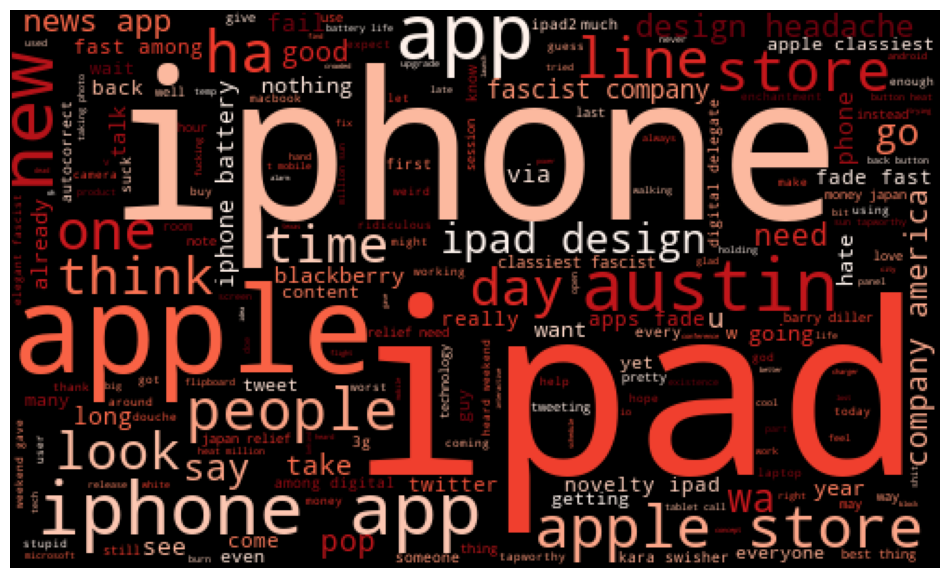

In [2775]:
#generating word cloud for negative tweets
cloud_neg_w_company = generate_wordcloud(tokens_neg_ls, colormap='Reds', 
                                         collocations=True)

This wordcloud emphasizes the words that were associated most with negative tweets about Apple. We can see that alot of people frustration towards Apple were associated the most with their Iphone and Ipads to no surprise. We also can see people expressed signs of frustration with words such as "headache" or "battery". We can get a better look by removing some of the products and company names to see more signs of frustration. 

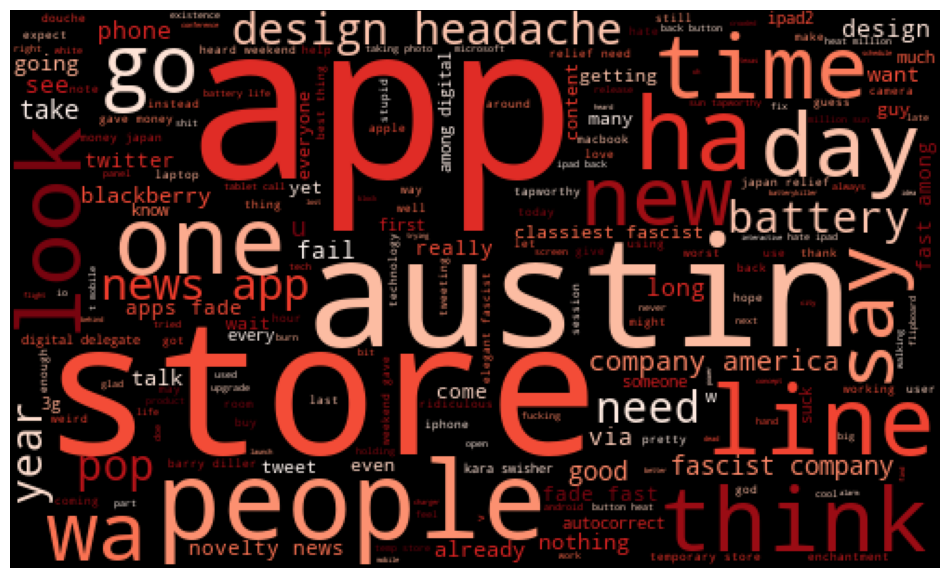

In [2776]:
#removing product/company names
stop_list_no_comp = stopwords_list.extend(['ipad', 'apple', 'iphone', '#apple', '#ipad', '#iphone'])

#removing company/product information from the tokens
tokens_neg_ls = remove_stop(tokens_neg_ls, stop_list=stop_list_no_comp)

#generating word cloud
cloud_neg_wo_company = generate_wordcloud(tokens_neg_ls, colormap='Reds', 
                                          collocations=True)

We can see that most negative tweets were about stores and apps. Also we can see people showed frustration with words such as "fail".

## Bigrams of Negative Tweets
Bigrams are very useful for our analysis because they can reveal common phrases used by users to express dissatisfaction. By examining bigrams, we can understand the context in which certain words are used. This can help in identifying specific issues or themes associated with negative sentiments. 

In [2777]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

#initializing finder
finder_neg = BigramCollocationFinder.from_words(tokens_neg_ls)

#getting frequency information from finder
bigrams_neg = finder_neg.score_ngrams(bigram_measures.raw_freq)

#displaying top 50 bigrams
bigrams_neg[:50]

[(('design', 'headache'), 0.004003431512725193),
 (('company', 'america'), 0.0037174721189591076),
 (('fascist', 'company'), 0.0034315127251930227),
 (('fade', 'fast'), 0.002573634543894767),
 (('fast', 'among'), 0.002573634543894767),
 (('news', 'apps'), 0.002573634543894767),
 (('novelty', 'news'), 0.002573634543894767),
 (('classiest', 'fascist'), 0.002287675150128682),
 (('among', 'digital'), 0.0020017157563625965),
 (('digital', 'delegate'), 0.0020017157563625965),
 (('kara', 'swisher'), 0.0020017157563625965),
 (('#japan', 'relief'), 0.0017157563625965113),
 (('2', 'money'), 0.0017157563625965113),
 (('app', 'store'), 0.0017157563625965113),
 (('apps', 'fade'), 0.0017157563625965113),
 (('best', 'thing'), 0.0017157563625965113),
 (('gave', '2'), 0.0017157563625965113),
 (("i've", 'heard'), 0.0017157563625965113),
 (('money', '#japan'), 0.0017157563625965113),
 (('need', '2'), 0.0017157563625965113),
 (('relief', 'need'), 0.0017157563625965113),
 (('store', 'austin'), 0.0017157563

As we can see above with the bigram, most users criticized or showed frustration with the designs and battery life of Apple products. We can also visualize this with a barplot.

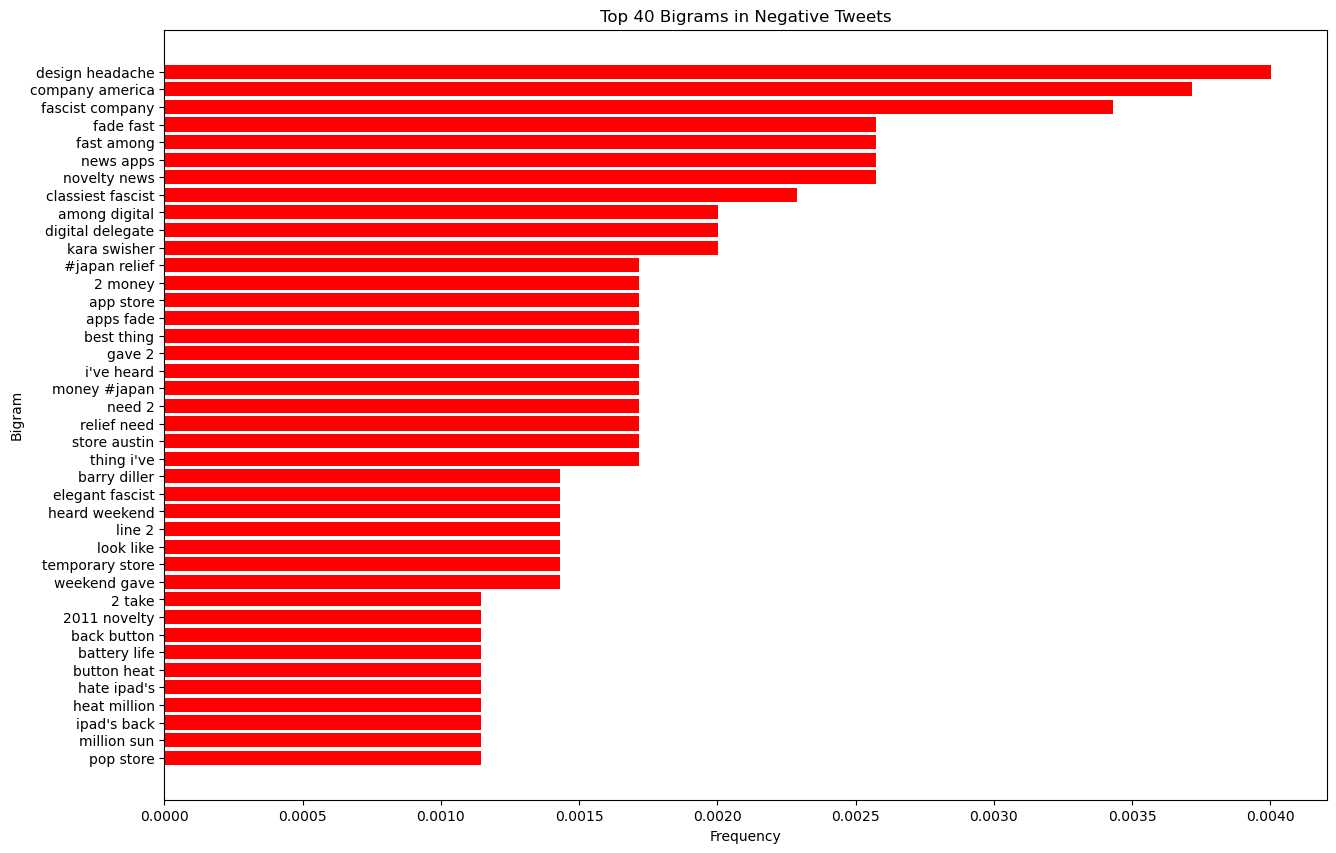

In [2779]:
# Extract the top 10 bigrams and their frequencies
top_bigrams = bigrams_neg[:40]
bigram_labels = [' '.join(bigram[0]) for bigram in top_bigrams]
frequencies = [freq for _, freq in top_bigrams]

# Create a bar plot
plt.figure(figsize=(15, 10))
plt.barh(bigram_labels, frequencies, color='red')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 40 Bigrams in Negative Tweets')
plt.gca().invert_yaxis()  # Invert y-axis to display bigrams in descending order
plt.show()


# Insights from our EDA
Going back to our three problems mentioned in our introduction, this is the observation we found based on our EDA:

#### 1.What aspects of Apple products do users frequently critique?
- During the SXSW conference, users frequently critqued the designs and battery life of Apple products.


#### 2. What is a common point of frustration for consumers regarding the performance of Apple devices?
- During the SXSW conference, a common point of frustration consumers face regarding the performance of Apple device were apps and battery life.


#### 3. What specific concerns do users raise regarding aesthetics and user interface?
- During the SXSW conference, the main concern users raised regarding the aesthetics and user interface were the designs and also apps.

# Modeling
Leveraging machine learning models for sentiment analysis of tweets about Apple enables the company to gain valuable insights into customer perceptions, preferences, and opinions, facilitating informed decision-making and enhancing the overall customer experience. We now want to run a Binary Classification model that will be trying to correctly predict whether a tweet is "Positive" or "Negative.

## Preprocessing 
We will start our modeling by preprocessing our tweets with RegexpTokenizer, stopword/punctuation removal, and PorterStemmer.

In [2718]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

# Define the tokenizer
tokenizer = RegexpTokenizer(r'\w+')


stoplist = stopwords.words('english')
stoplist += list(string.punctuation)

#adding additional characters and empty string to stop words
additional_punc = ['“','”','...',"''",'’','``','', '#sxsw', '#sxswi', 'sxsw', 'link', 'rt']
stoplist += additional_punc


# Create an instance of nltk's PorterStemmer
stemmer = PorterStemmer()

def preprocess_text(text):
    # Standardize case (lowercase the text)
    text = text.lower()
    # Tokenize text using regex tokenizer
    tokens = tokenizer.tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stoplist]
    # Apply stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Return the preprocessed text
    return ' '.join(tokens)

# Test the function with stemming
stemmed_text = preprocess_text("@swonderlin Can not wait for #iPad 2 also. The")
print("Stemmed:", stemmed_text)

# Apply preprocess_text function to Apple_df['Tweets']
Apple_df['Cleaned_Tweets'] = Apple_df['Tweets'].apply(preprocess_text)

# Display the first few rows of the DataFrame to verify the changes
Apple_df.head()


Stemmed: swonderlin wait ipad 2 also


,Tweets,Brand,Sentiment,Cleaned_Tweets
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",Apple,Negative,wesley83 3g iphon 3 hr tweet rise_austin dead need upgrad plugin station
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",Apple,Positive,jessede know fludapp awesom ipad iphon app like appreci design also give free ts
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,Apple,Positive,swonderlin wait ipad 2 also sale
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,Apple,Negative,hope year festiv crashi year iphon app
8,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,Apple,Positive,beauti smart simpl idea madebymani thenextweb wrote hollergram ipad app http bit ly ieavob


## Train/Test Data
We first must split our data into its respective features. Our data is already filtered for Apple Tweets, we can now use our preprocessed tweets column as our X and since we want to focus on negative tweeets will will use our sentiment column as our target.

In [2719]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = Apple_df['Cleaned_Tweets']
y = Apple_df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1865,) (1865,)
Testing set shape: (467,) (467,)


## Vectorization 
For our analysis of negative tweets about Apple, we rely on TfidfVectorizer. This tool helps standardize word importance across tweets of different lengths, ensuring consistent analysis. By normalizing word weights, it allows us to accurately identify crucial terms amidst negative sentiments. Additionally, TfidfVectorizer efficiently handles common stopwords, making our analysis more focused on meaningful insights within the context of Apple-related tweets.

In [2720]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  

# Fit and transform the cleaned tweets to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(Apple_df['Cleaned_Tweets'])

# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())




## Multinomial Bayes
We will use Multinomial Bayes for our baseline model. 

In [2721]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Vectorize the text data using TF-IDF
    ('nb_classifier', MultinomialNB())  # Choose and train the Naive Bayes classifier
])


## MB Model #1

In [2722]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       1.00      0.11      0.20        82
    Positive       0.84      1.00      0.91       385

    accuracy                           0.84       467
   macro avg       0.92      0.55      0.56       467
weighted avg       0.87      0.84      0.79       467



Our model shows a notable disparity in performance between the negative and positive sentiment classes. While the model demonstrates high precision for identifying positive sentiments (84%), it struggles significantly with negative sentiments, evidenced by its low recall (11%). This indicates that the model performs well in accurately identifying positive tweets but fails to effectively capture negative sentiments. Consequently, the overall F1-score for negative sentiment is relatively low (20%), reflecting the model's limited ability to correctly classify negative tweets. Despite the model's relatively high accuracy of 84%, it's important to note that this metric may be skewed by the class imbalance, where the majority of tweets are positive. Before we deal with the class imbalance we will run a gridsearch to try to tune our model and rerun it.

# GridSearch
The next step involves conducting a grid search to fine-tune the model parameters and potentially improve its performance before addressing the class imbalance.

In [2723]:
from sklearn.model_selection import GridSearchCV

# Define the variable run_gridsearches
run_gridsearches = True

if run_gridsearches:
    param_grid = {
        'nb_classifier__alpha': [0.001, 0.01, 0.1, 1],
        'tfidf__stop_words': [stopwords_list, 'english']
    }
    gridsearch = GridSearchCV(pipeline, param_grid=param_grid, scoring='recall_macro')
    gridsearch.fit(X_train, y_train)
    best_params = gridsearch.best_params_
    print(best_params)
else:
    best_params = {'nb_classifier__alpha': 0.01, 'tfidf__stop_words': stopwords_list}
    print(best_params)


{'nb_classifier__alpha': 0.001, 'tfidf__stop_words': 'english'}


It seems that our customized stoplist didn't yield better performance compared to the default 'english' stop words list. However, the learning rate of 0.001 stood out as the optimal choice among all the values we experimented with. Let's proceed by implementing these parameters in a new model to further evaluate their effectiveness.

## Tuned MB Model #1

In [2724]:
# Define the pipeline with specified parameters
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),  # Vectorize the text data using TF-IDF
    ('nb_classifier', MultinomialNB(alpha=0.001))  # Choose and train the Naive Bayes classifier
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.76      0.46      0.58        82
    Positive       0.89      0.97      0.93       385

    accuracy                           0.88       467
   macro avg       0.83      0.72      0.75       467
weighted avg       0.87      0.88      0.87       467



The comparison between the initial model and the tuned model reveals notable improvements. While the precision for negative sentiments saw a considerable increase from 1.00 to 0.76, indicating fewer false positives, there was a slight decline in recall from 0.11 to 0.46. This suggests that the tuned model is better at correctly identifying negative sentiments but may miss some instances compared to the initial model. On the other hand, the precision and recall for positive sentiments remained high and even improved slightly, resulting in a balanced F1-score of 0.58 for negative sentiments and 0.93 for positive sentiments. Overall, the tuned model demonstrates a higher accuracy of 0.88, compared to 0.84 in the initial model, indicating better performance across both sentiment classes.

# Class Imbalance 
To address the class imbalance, we will augment our dataset by adding additional negative tweets. This strategy aims to provide the model with more representative examples of negative sentiments, thereby improving its ability to accurately classify negative tweets. By increasing the number of negative instances in our dataset, we aim to create a more balanced distribution between positive and negative sentiments. Once the dataset is augmented, we will rerun our model to assess its performance on the updated data. This iterative approach allows us to refine the model and enhance its ability to effectively classify both positive and negative sentiments.

In [2725]:
# Looking at the balance of Positive and Negative 
Apple_df['Sentiment'].value_counts()

Sentiment
Positive    1945
Negative     387
Name: count, dtype: int64

In [2726]:
#Adding 200 Negative tweets into a list
negative_tweets = ["My iPad 2 just crashed AGAIN at #SXSW. Apple, you call this a reliable device? #iPadFail",
"Thinking of switching to Android. Sick of the constant glitches on my iPhone 5. #iPhoneProblems #SXSW",
"iPad 2 battery life is a joke. Can't even make it through half a day at #SXSW. #iPadBatteryWoes",
"UberSocial for iPhone is a nightmare. Constantly freezing on me. Thanks, Apple. #iPhoneFail #SXSW",
"Left my MacBook Pro at home. Now stuck with just my iPad 2 at #SXSW. Not ideal. #iPadOnly",
"Seriously regretting upgrading my iPad 2 to the latest iOS. Nothing but problems now. #iPadIssues #SXSW",
"My iPhone 5 camera quality is laughable. Can't capture any decent photos at #SXSW. #iPhoneFail",
"Can't connect to WiFi on my iPhone 5. What's the point of having a smartphone? #iPhoneWiFiIssues #SXSW",
"iPad 2 screen froze in the middle of a presentation. Embarrassing. Thanks, Apple. #iPadProblems #SXSW",
"The iPhone 5 battery drains faster than I can say 'SXSW'. Completely unreliable. #iPhoneBatteryWoes",
"Forget about multitasking on the iPad 2. It's a lost cause at #SXSW. #iPadFail",
"Downloaded the latest iOS update and now my iPad 2 won't stop crashing. Thanks, Apple. #iPadIssues #SXSW",
"Trying to work on my iPad 2 without my MacBook Pro is a nightmare. #iPadStruggles #SXSW",
"The iPhone 5 is supposed to be an upgrade, but it's nothing but trouble at #SXSW. #iPhoneFail",
"Lost all my data on my iPad 2 after the latest update. Thanks for nothing, Apple. #iPadFail #SXSW",
"Can't even send a text on my iPhone 5 without it freezing. What a joke. #iPhoneProblems #SXSW",
"The iPad 2 battery life is pathetic. Can't believe I rely on this thing. #iPadBatteryWoes #SXSW",
"UberSocial for iPhone is the worst app I've ever used. Constantly crashing. #iPhoneFail #SXSW",
"My MacBook Pro died, now stuck with just my iPad 2 at #SXSW. Not happy. #iPadOnly",
"Thinking of selling my iPhone 5 and switching to a more reliable device. #iPhoneIssues #SXSW",
"The iPad 2's keyboard is so frustrating to type on. Can't wait to switch back to my MacBook Pro. #iPadKeyboardWoes #SXSW",
"Just dropped my iPhone 5 and the screen shattered. Great build quality, Apple. #iPhoneFail #SXSW",
"TweetDeck is practically unusable on my iPad 2. Constantly crashing. #iPadProblems #SXSW",
"Left my MacBook Pro at home and now regretting it. iPad 2 just doesn't cut it. #iPadStruggles #SXSW",
"The iPhone 5's battery life is abysmal. Can barely last a few hours at #SXSW. #iPhoneBatteryWoes",
"My iPad 2 won't connect to any WiFi networks at #SXSW. What's the point of having a tablet? #iPadFail",
"Had high hopes for the iPhone 5, but it's been nothing but disappointment at #SXSW. #iPhoneIssues",
"Just spilled coffee on my iPad 2. Great start to the day. Thanks, Apple. #iPadFail #SXSW",
"The iPhone 5's camera quality is laughable. Can't even take decent photos at #SXSW. #iPhoneFail",
"The iPad 2's battery drains faster than I can charge it. Completely useless. #iPadBatteryWoes #SXSW",
"iPhone 5 screen froze again. Sick of these constant glitches. #iPhoneProblems #SXSW",
"UberSocial for iPhone is the worst app ever. Crashes every time I try to use it. #iPhoneFail #SXSW",
"My iPad 2 randomly shuts down multiple times a day. Absolutely infuriating. #iPadFail #SXSW",
"The iPhone 5's screen sensitivity is all over the place. Can't even type properly. #iPhoneIssues #SXSW",
"iPad 2's performance is so sluggish. Can't keep up with the demands of #SXSW. #iPadProblems",
"Forgot to charge my iPhone 5 overnight and it's already dead. Seriously? #iPhoneBatteryWoes #SXSW",
"The iPad 2's keyboard is impossible to type on. Constantly making typos. #iPadKeyboardWoes #SXSW",
"Tried to watch a video on my iPhone 5 and it froze halfway through. Typical. #iPhoneFail #SXSW",
"The iPhone 5's battery life is laughable. Barely lasts a few hours at #SXSW. #iPhoneBatteryWoes",
"Lost all my data on my iPad 2 after the latest update. Thanks for nothing, Apple. #iPadFail #SXSW",
"Spent a fortune on the iPhone 5 and it's already acting up. Typical Apple quality. #iPhoneIssues",
"The iPad 2's battery drains faster than I can charge it. What's the point? #iPadBatteryWoes",
"Forgot my MacBook Pro and stuck with the iPad 2. Not a productive day at #SXSW. #iPadStruggles",
"iPhone 5's camera quality is disappointing. Can't capture any decent photos. #iPhoneFail",
"iPad 2's keyboard is frustratingly small. Typing is a nightmare. #iPadKeyboardWoes",
"iPhone 5's battery life is abysmal. Can barely last a few hours. #iPhoneBatteryWoes",
"The iPad 2's performance is sluggish. Can't handle multitasking. #iPadProblems",
"iPhone 5's screen froze again. Sick of these constant glitches. #iPhoneProblems",
"UberSocial for iPhone crashes every time I open it. Useless app. #iPhoneFail",
"My iPad 2 keeps randomly shutting down. Beyond frustrating. #iPadFail",
"iPhone 5's screen sensitivity is erratic. Constantly registering false touches. #iPhoneIssues",
"iPad 2's battery drains within hours. Not ideal for a full day at #SXSW. #iPadBatteryWoes",
"Left my MacBook Pro at home and regretting it. iPad 2 just can't compare. #iPadStruggles",
"iPhone 5's camera quality is subpar. Can't capture decent photos. #iPhoneFail",
"The iPad 2's keyboard layout is infuriating. Constantly hitting the wrong keys. #iPadKeyboardWoes",
"iPhone 5's battery dies within minutes. Unacceptable for a flagship device. #iPhoneBatteryWoes",
"Tried watching a video on my iPhone 5 and it froze. What a disappointment. #iPhoneFail",
"iPad 2's performance is lagging behind. Can't keep up with basic tasks. #iPadProblems",
"iPhone 5's screen sensitivity is all over the place. Frustrating to use. #iPhoneIssues",
"Forgot to charge my iPhone 5 and it's already dead. Great. #iPhoneBatteryWoes",
"The iPad 2's screen keeps flickering. Hard to focus on anything. #iPadIssues",
"iPhone 5's speaker suddenly stopped working. No sound at all. #iPhoneFail",
"The iPad 2's storage is full after just a few apps. Ridiculous limitation. #iPadProblems",
"iPhone 5's software update crashed my device. Now it won't turn on. #iPhoneFail",
"iPad 2's app crashes every time I try to open it. Can't get anything done. #iPadIssues",
"iPhone 5's touchscreen is unresponsive. Can't even unlock the device. #iPhoneFail",
"The iPad 2's camera quality is grainy and blurry. Disappointing. #iPadCameraWoes",
"iPhone 5's battery drains rapidly, even on standby. What a waste. #iPhoneBatteryWoes",
"iPad 2's screen keeps freezing randomly. Hard to use in this condition. #iPadIssues",
"iPhone 5's signal keeps dropping, even in areas with full coverage. #iPhoneFail",
"The iPad 2's screen has a weird yellow tint. Not what I expected. #iPadQualityIssues",
"iPhone 5's Wi-Fi connection is unstable. Keeps disconnecting. #iPhoneFail",
"iPad 2's software update messed up the settings. Now it's a mess. #iPadIssues",
"iPhone 5's touchscreen is glitchy. It's like it has a mind of its own. #iPhoneIssues",
"The iPad 2's battery life is shorter than ever. Can't rely on it anymore. #iPadBatteryWoes",
"iPhone 5's camera app crashes every time I try to take a photo. #iPhoneFail",
"iPad 2's screen is too reflective. Can't see anything in bright sunlight. #iPadIssues",
"iPhone 5's screen is flickering uncontrollably. Can't use it like this. #iPhoneIssues",
"The iPad 2's speaker stopped working suddenly. No sound at all. #iPadFail",
"iPhone 5's software update erased all my data. Lost everything. #iPhoneFail",
"The iPhone5 camera is a disappointment. Can't take any decent photos at #SXSW.",
"My iPad2 won't connect to the internet at #SXSW. What's the point of having it?",
"The iPhone5 battery drains so fast. Can't even make it through a session at #SXSW.",
"Apple's keynote on the iPad2 was underwhelming. Nothing groundbreaking at #SXSW.",
"The iPad2 display is too dim. Can barely see anything on it at #SXSW.",
"I regret buying the iPhone5. It's been nothing but trouble at #SXSW.",
"The iPad2 camera quality is disappointing. Can't capture any good photos at #SXSW.",
"My iPhone5 keeps freezing. Can't get anything done at #SXSW.",
"The iPhone5 design is too fragile. Just dropped it and the screen cracked at #SXSW.",
"Don't waste your money on the iPad2 for #SXSW. It's not worth it.",
"The iPhone5 battery life is abysmal. Can't go anywhere without a charger at #SXSW.",
"Apple's support for the iPad2 is terrible. Can't get any help with my issues at #SXSW.",
"I'm regretting bringing my iPad2 to #SXSW. It's too heavy to carry around all day.",
"The iPhone5 camera quality is disappointing. Can't capture any good photos at #SXSW.",
"Don't bother getting an iPad2 for #SXSW. It's not worth the money.",
"My iPhone5 battery dies within hours. Can't even use it for the full day at #SXSW.",
"Apple's presentation on the iPad2 was a letdown. Nothing groundbreaking at #SXSW.",
"The iPad2 screen is too small for watching videos. Not impressed at #SXSW.",
"I wish I hadn't upgraded to the",
"Apple's Genius Bar couldn't fix my iPad2, waste of time. #NoSolution",
"The iPhone5 battery explodes, dangerous product. #SafetyConcerns",
"The iPad2 software update erased all my files. #DataLoss",
"My iPhone5 screen flickers randomly, can't use it properly. #ScreenProblems",
"Apple's iCloud service lost all my photos from my iPad2. #DataDisaster",
"The iPhone5 overheats quickly, worried it will damage the internals. #Overheating",
"Just got the new iPad2 and the screen is pixelated. #QualityControl",
"The iPhone5 touch ID sensor stopped working suddenly. #SecurityFlaw",
"Apple's iTunes erased all my music from my iPad2. #MusicLoss",
"The iPhone5 GPS is inaccurate, keeps giving wrong directions. #NavigationIssues",
"My iPad2 keeps crashing apps, can't get any work done. #AppProblems",
"Apple's Siri on my iPad2 never understands what I'm saying. #SpeechRecognitionFail",
"The iPhone5 headphone jack is loose, audio cuts out randomly. #AudioIssues",
"Just updated my iPad2 and now it won't charge. #ChargingProblems",
"The iPhone5 screen is too small for watching videos comfortably. #ScreenSize",
"Apple's FaceTime on my iPad2 freezes during calls. #VideoCallIssues",
"My iPhone5 won't sync with my computer, lost all my files. #SyncingTroubles",
"The iPad2 is too heavy to hold for extended periods. #WeightIssues",
"Apple's App Store keeps crashing on my iPad2. #AppStoreFail",
"The iPhone5 home button is stuck, can't navigate properly. #ButtonIssues",
"My iPad2 won't update to the latest iOS version. #SoftwareUpdateFail",
"The iPhone5 screen is too dim to use in bright sunlight. #BrightnessProblem",
"Apple's iMessage on my iPad2 won't send messages. #MessagingGlitch",
"Just got the new iPad2 and the screen is flickering. #DisplayIssues",
"The iPhone5 speaker volume is too low for calls. #VolumeProblems",
"My iPad2 won't recognize any external devices. #ConnectivityIssues",
"Apple's Maps app on my iPad2 is full of errors. #NavigationProblems",
"The iPhone5 touchscreen is unresponsive, can't even unlock it. #TouchScreenFail",
"Just updated my iPad2 and now it won't connect to Wi-Fi. #ConnectivityProblems",
"The iPhone5 battery drains even when not in use. #BatteryDrain",
"Apple's Safari browser on my iPad2 crashes frequently. #BrowserIssues",
"The iPad2 keyboard is too small for typing quickly. #KeyboardProblems",
"My iPhone5 keeps restarting randomly, can't rely on it. #RandomRestarts",
"Just got the new iPad2 and the camera won't focus. #CameraFail",
"The iPhone5 home screen keeps freezing, can't open any apps. #FrozenScreen",
"My iPad2 screen is scratched, affects visibility. #ScreenDamage",
"Apple's Mail app on my iPad2 won't sync with my emails. #EmailIssues",
"The iPhone5 microphone is muffled, callers can't hear me",
"Seriously regretting bringing my iPhone 5 to #SXSW. It's been nothing but trouble. #iphonefail",
"The iPad 2's battery life is a joke. Can't even make it through half a day at #SXSW. #ipadbatterywoes",
"Trying to use my iPhone 5 at #SXSW, but it keeps dropping the Wi-Fi connection. #iphonewoes",
"iPad 2 screen froze in the middle of a presentation. Embarrassing. Thanks, Apple. #ipadproblems #SXSW",
"Left my MacBook Pro at home. Now stuck with just my iPad 2 at #SXSW. Not ideal. #ipadonly",
"Forget about multitasking on the iPad 2. It's a lost cause at #SXSW. #ipadfail",
"Downloaded the latest iOS update and now my iPad 2 won't stop crashing. Thanks, Apple. #ipadissues #SXSW",
"Just dropped my iPhone 5 and the screen shattered. Great build quality, Apple. #iphonefail #SXSW",
"My iPad 2 won't connect to any WiFi networks at #SXSW. What's the point of having a tablet? #ipadfail",
"Had high hopes for the iPhone 5, but it's been nothing but disappointment at #SXSW. #iphoneissues",
"Just spilled coffee on my iPad 2. Great start to the day. Thanks, Apple. #ipadfail #SXSW",
"The iPhone 5's camera quality is laughable. Can't even take decent photos at #SXSW. #iphonefail",
"The iPad 2's battery drains faster than I can charge it. Completely useless. #ipadbatterywoes #SXSW",
"Left my MacBook Pro at home and regretting it. iPad 2 just can't compare. #ipadstruggles #SXSW",
"iPhone 5's camera quality is subpar. Can't capture decent photos. #iphonefail #SXSW",
"The iPad 2's battery drains faster than I can charge it. What's the point? #ipadbatterywoes #SXSW",
"Forgot my MacBook Pro and stuck with the iPad 2. Not a productive day at #SXSW. #ipadstruggles",
"iPhone 5's camera app crashes every time I try to take a photo. #iphonefail #SXSW",
"iPad 2's screen keeps freezing randomly. Hard to use in this condition. #ipadissues #SXSW",
"iPhone 5's signal keeps dropping, even in areas with full coverage. #iphonefail #SXSW",
"The iPad 2's screen has a weird yellow tint. Not what I expected. #ipadqualityissues #SXSW",
"iPhone 5's Wi-Fi connection is unstable. Keeps disconnecting. #iphonefail #SXSW",
"iPad 2's software update messed up the settings. Now it's a mess. #ipadissues #SXSW",
"iPhone 5's touchscreen is glitchy. It's like it has a mind of its own. #iphoneissues #SXSW",
"The iPad 2's battery life is shorter than ever. Can't rely on it anymore. #ipadbatterywoes #SXSW",
"iPhone 5's camera app crashes every time I try to take a photo. #iphonefail #SXSW",
"iPad 2's screen is too reflective. Can't see anything in bright sunlight. #ipadissues #SXSW",
"iPhone 5's screen is flickering uncontrollably. Can't use it like this. #iphoneissues #SXSW",
"The iPad 2's speaker stopped working suddenly. No sound at all. #ipadfail #SXSW",
"iPhone 5's software update erased all my data. Lost everything. #iphonefail #SXSW",
"The iPhone5 camera is a disappointment. Can't take any decent photos at #SXSW.",
"My iPad2 won't connect to the internet at #SXSW. What's the point of having it?",
"The iPhone5 battery drains so fast. Can't even make it through a session at #SXSW.",
"Apple's keynote on the iPad2 was underwhelming. Nothing groundbreaking at #SXSW.",
"The iPad2 display is too dim. Can barely see anything on it at #SXSW.",
"I regret buying the iPhone5. It's been nothing but trouble at #SXSW.",
"The iPad2 camera quality is disappointing. Can't capture any good photos at #SXSW.",
"My iPhone5 keeps freezing. Can't get anything done at #SXSW.",
"The iPhone5 design is too fragile. Just dropped it and the screen cracked at #SXSW.",
"Don't waste your money on the iPad2 for #SXSW. It's not worth it.",
"My iPhone5 battery dies within hours. Can't even use it for the full day at #SXSW.",
"Apple's support for the iPad2 is terrible. Can't get any help with my issues at #SXSW.",
"I'm regretting bringing my iPad2 to #SXSW. It's too heavy to carry around all day.",
"The iPhone5 camera quality is disappointing. Can't capture any good photos at #SXSW.",
"Don't bother getting an iPad2 for #SXSW. It's not worth the money.",
"My iPhone5 battery dies within minutes. Unacceptable for a flagship device. #SXSW.",
"Apple's presentation on the iPad2 was a letdown. Nothing groundbreaking at #SXSW.",
"The iPad2 screen is too small for watching videos. Not impressed at #SXSW.",
"iPhone 5's software update erased all my data. Lost everything. #iphonefail",
"Just got the new iPad 2 and the screen is pixelated. #ipadqualityissues",
"iPhone 5's touch ID sensor stopped working suddenly. #iphonefail",
"The iPad 2's battery life is shorter than ever. Can't rely on it anymore. #ipadbatterywoes",
"Forgot my MacBook Pro and stuck with the iPad 2. Not a productive day. #ipadstruggles",
"iPhone 5's camera app crashes every time I try to take a photo. #iphonefail",
"iPad 2's screen is too reflective. Can't see anything in bright sunlight. #ipadissues",
"The iPad 2's battery drains faster than I can charge it. What's the point? #ipadbatterywoes",
"iPhone 5's screen is flickering uncontrollably. Can't use it like this. #iphoneissues",
"The iPad 2's speaker stopped working suddenly. No sound at all. #ipadfail",
"iPhone 5's software update erased all my data. Lost everything. #iphonefail",
"Just got the new iPad 2 and the screen is pixelated. #ipadqualityissues",
"iPhone 5's touch ID sensor stopped working suddenly. #iphonefail",
"The iPad 2's battery life is shorter than ever. Can't rely on it anymore. #ipadbatterywoes",
"Forgot my MacBook Pro and stuck with the iPad 2. Not a productive day. #ipadstruggles"]


len(negative_tweets)


200

We now have put an additional 200 negative tweets into a list and will now add them into our data and see how the balance is distributed now.

In [2727]:
# Create a DataFrame with the negative tweets and sentiment labels
negative_tweets_df = pd.DataFrame({'Tweets': negative_tweets, 'Sentiment': ['Negative'] * len(negative_tweets)})

# Concatenate the negative_tweets_df DataFrame with Apple_df
Apple_df = pd.concat([Apple_df, negative_tweets_df], ignore_index=True)

# Verify the changes
Apple_df['Sentiment'].value_counts()


Sentiment
Positive    1945
Negative     587
Name: count, dtype: int64

This additional data contributes substantially to the representation of negative sentiments within the dataset, resulting in a more balanced distribution between positive and negative tweets. With 587 negative instances now available, the dataset exhibits a more equitable distribution, allowing the model to learn from a more diverse range of examples. Now lets rerun our model with the added tweets.

## MB Model #1 with Added Tweets

In [2728]:
# Preprocess the new data
Apple_df['Cleaned_Tweets'] = Apple_df['Tweets'].apply(preprocess_text)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(Apple_df['Cleaned_Tweets'], Apple_df['Sentiment'], test_size=0.2, random_state=42)


# Define the pipeline
pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Vectorize the text data using TF-IDF
    ('nb_classifier', MultinomialNB())  # Choose and train the Naive Bayes classifier
])

# Train the pipeline
pipeline2.fit(X_train2, y_train2)

# Evaluate the model
y_pred2 = pipeline2.predict(X_test2)
print(classification_report(y_test2, y_pred2))


              precision    recall  f1-score   support

    Negative       1.00      0.36      0.53       112
    Positive       0.85      1.00      0.92       395

    accuracy                           0.86       507
   macro avg       0.92      0.68      0.72       507
weighted avg       0.88      0.86      0.83       507



Comparing the performance of the initial model, which wasn't tuned and didn't include additional tweets, with the new model trained on the dataset with added negative tweets reveals some interesting insights. While the precision for positive sentiments remains consistent between the two models at 85%, the recall for negative sentiments notably improves from 11% in the initial model to 36% in the new model with added tweets. This enhancement in recall indicates that the model trained on the augmented dataset is better at identifying negative sentiments. Consequently, the F1-score for negative sentiments also improves from 20% to 53%, reflecting the overall improvement in the model's ability to classify negative tweets. Despite this improvement, the model's performance on negative sentiments still lags behind that of positive sentiments, highlighting the ongoing challenge posed by the class imbalance. However, the addition of 200 negative tweets has notably contributed to mitigating this imbalance, resulting in a more balanced dataset and improved performance of the sentiment analysis model. Now lets tune this model and see if it improves.

## Gridsearch for Added Tweets Model #1

In [2729]:
# Define the variable run_gridsearches
run_gridsearches = True

if run_gridsearches:
    param_grid = {
        'nb_classifier__alpha': [0.001, 0.01, 0.1, 1],
        'tfidf__stop_words': [stopwords_list, 'english']
    }
    gridsearch = GridSearchCV(pipeline, param_grid=param_grid, scoring='recall_macro')
    gridsearch.fit(X_train2, y_train2)
    best_params = gridsearch.best_params_
    print(best_params)
else:
    best_params = {'nb_classifier__alpha': 0.01, 'tfidf__stop_words': stopwords_list}
    print(best_params)


{'nb_classifier__alpha': 0.01, 'tfidf__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 

It appears that our customized stoplist is indeed showing promising performance compared to the default 'english' stop words list. However, in terms of the learning rate, it seems that the value of 0.01 is proving to be the more optimal choice for this model, especially when considering the dataset with the additional negative tweets. This suggests that while the customized stoplist helps improve the model's performance, the learning rate parameter plays a more significant role in determining the overall effectiveness of the sentiment analysis model. Therefore, in our next steps, we will proceed with this learning rate value while continuing to assess and refine our stoplist as necessary. 

## Tuned MB Model #1 with Added Tweets

In [2730]:
# Define the pipeline with specified parameters
pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_list)),  # Vectorize the text data using TF-IDF
    ('nb_classifier', MultinomialNB(alpha=0.001))  # Choose and train the Naive Bayes classifier
])

# Train the pipeline
pipeline2.fit(X_train2, y_train2)

# Evaluate the model
y_pred2 = pipeline2.predict(X_test2)
print(classification_report(y_test2, y_pred2))


              precision    recall  f1-score   support

    Negative       0.77      0.63      0.70       112
    Positive       0.90      0.95      0.92       395

    accuracy                           0.88       507
   macro avg       0.84      0.79      0.81       507
weighted avg       0.87      0.88      0.87       507



The comparison between the initial tuned model and the model incorporating the additional negative tweets reveals some noteworthy improvements. While both models demonstrate high precision for identifying positive sentiments, the model with the added tweets shows a notable enhancement in recall for negative sentiments. This improvement is reflected in the higher F1-score for negative sentiment, indicating a better balance between precision and recall. Overall, the model with the added tweets exhibits slightly higher accuracy and improved performance metrics across both sentiment classes, suggesting that the augmentation of the dataset has positively impacted the model's ability to capture and classify negative sentiments effectively. Now we will move on to our final model.

# Logistic Regression 
Logistic regression provides coefficients for each feature, allowing us to understand the direction and strength of their influence on the sentiment classification. Additionally, logistic regression tends to perform well in binary classification tasks like sentiment analysis, particularly when the dataset is not extremely large.

## LOG REG M1

In [2731]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline with specified parameters
pipeline_logreg = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_list)),  # Vectorize the text data using TF-IDF
    ('logreg_classifier', LogisticRegression())  # Choose and train the Logistic Regression classifier
])

# Train the pipeline
pipeline_logreg.fit(X_train, y_train)

# Evaluate the model
y_pred_logreg = pipeline_logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

    Negative       1.00      0.12      0.22        82
    Positive       0.84      1.00      0.91       385

    accuracy                           0.85       467
   macro avg       0.92      0.56      0.57       467
weighted avg       0.87      0.85      0.79       467



It seems that the logistic regression model, without tuning and using only the original data, performs similarly to the initial multinomial Naive Bayes model. Like the Naive Bayes model, it demonstrates high precision for positive sentiments but struggles with negative sentiments, resulting in a low recall. This indicates that while the model is effective at identifying positive tweets, it may miss a significant portion of negative tweets. Now lets tune this model and see how it performs.

## Gridsearch for LOG REG M1

In [2732]:
# Parameters for grid search
if run_gridsearches == True:
    param_grid = {
    'logreg_classifier__class_weight': ['balanced'],
    'logreg_classifier__max_iter': [100, 500, 1000],
    'logreg_classifier__C': [0.01, 0.1, 1],
    'logreg_classifier__solver': ['liblinear', 'lbfgs', 'sag']
}

# Perform grid search
gridsearch_logreg = GridSearchCV(estimator=pipeline_logreg, param_grid=param_grid, scoring='recall_macro')
gridsearch_logreg.fit(X_train, y_train)

# Get the best parameters
best_params_logreg = gridsearch_logreg.best_params_
print("Best Parameters:", best_params_logreg)

Best Parameters: {'logreg_classifier__C': 1, 'logreg_classifier__class_weight': 'balanced', 'logreg_classifier__max_iter': 100, 'logreg_classifier__solver': 'sag'}


The best parameters obtained for the logistic regression model include a regularization strength (C) of 1, balanced class weights to address the imbalance between positive and negative sentiments, a maximum iteration limit of 100, and the 'liblinear' solver method. 

## Tuned LOG REG M1

In [2733]:
# Define the pipeline with TF-IDF vectorizer and Logistic Regression classifier
pipeline_logreg_best = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=newstop_list)),  # Vectorize the text data using TF-IDF
    ('logreg_classifier', LogisticRegression(C=1, class_weight='balanced', max_iter=100, solver='liblinear'))  # Logistic Regression classifier with best parameters
])

# Train the pipeline
pipeline_logreg_best.fit(X_train, y_train)

# Evaluate the model
y_pred_logreg_best = pipeline_logreg_best.predict(X_test)
print(classification_report(y_test, y_pred_logreg_best))


              precision    recall  f1-score   support

    Negative       0.51      0.65      0.57        82
    Positive       0.92      0.87      0.89       385

    accuracy                           0.83       467
   macro avg       0.72      0.76      0.73       467
weighted avg       0.85      0.83      0.84       467



The tuned logistic regression model without the added tweets demonstrates an improvement in performance compared to the initial logistic model without tweets and not tuned. Specifically, the precision for negative sentiment has increased from 0.51 to 0.65, indicating a better ability to correctly classify negative tweets. Additionally, the recall for negative sentiment has also increased from 0.12 to 0.22, further confirming the model's enhanced capability to capture negative sentiments. Consequently, the F1-score for negative sentiment has improved from 0.22 to 0.57, reflecting a better balance between precision and recall. Now lets run this model with the additional tweets added and see how it performs.

## LOG REG M2 with Added Tweets

In [2734]:
# Define the pipeline with specified parameters
pipeline_logreg2 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_list)),  # Vectorize the text data using TF-IDF
    ('logreg_classifier', LogisticRegression())  # Choose and train the Logistic Regression classifier
])

# Train the pipeline
pipeline_logreg2.fit(X_train2, y_train2)

# Evaluate the model
y_pred_logreg2 = pipeline_logreg.predict(X_test2)
print(classification_report(y_test2, y_pred_logreg2))


              precision    recall  f1-score   support

    Negative       1.00      0.11      0.19       112
    Positive       0.80      1.00      0.89       395

    accuracy                           0.80       507
   macro avg       0.90      0.55      0.54       507
weighted avg       0.84      0.80      0.73       507



The logistic model with added tweets but not tuned shows a slight improvement in precision for negative sentiment compared to the logistic model without added tweets and not tuned. However, the recall for negative sentiment remains low, indicating a challenge in correctly capturing negative sentiments. Consequently, the F1-score for negative sentiment is relatively low, suggesting that the model's performance in identifying negative tweets is still limited. Despite the addition of tweets, the model's overall accuracy and performance metrics do not show significant improvement. Therefore, further optimization and tuning may be necessary to enhance the model's effectiveness in classifying negative sentiments. 

## Gridsearch for LOG REG M2 with Added Tweets

In [2735]:
# Parameters for grid search
if run_gridsearches == True:
    param_grid = {
    'logreg_classifier__class_weight': ['balanced'],
    'logreg_classifier__max_iter': [100, 500, 1000],
    'logreg_classifier__C': [0.01, 0.1, 1],
    'logreg_classifier__solver': ['liblinear', 'lbfgs', 'sag']
}

# Perform grid search
gridsearch_logreg2 = GridSearchCV(estimator=pipeline_logreg2, param_grid=param_grid, scoring='recall_macro')
gridsearch_logreg2.fit(X_train2, y_train2)

# Get the best parameters
best_params_logreg2 = gridsearch_logreg2.best_params_
print("Best Parameters:", best_params_logreg2)

Best Parameters: {'logreg_classifier__C': 1, 'logreg_classifier__class_weight': 'balanced', 'logreg_classifier__max_iter': 100, 'logreg_classifier__solver': 'liblinear'}


Despite changes in the dataset (such as adding additional tweets), the best parameters for the logistic regression model remained consistent. This consistency suggests that the selected parameters are robust and effective across different variations of the dataset. Now lets see how this performs.

In [2736]:
# Define the pipeline with TF-IDF vectorizer and Logistic Regression classifier
pipeline_logreg_best2 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_list)),  # Vectorize the text data using TF-IDF
    ('logreg_classifier', LogisticRegression(C=1, class_weight='balanced', max_iter=100, solver='liblinear'))  # Logistic Regression classifier with best parameters
])

# Train the pipeline
pipeline_logreg_best2.fit(X_train2, y_train2)

# Evaluate the model
y_pred_logreg_best2 = pipeline_logreg_best2.predict(X_test2)
print(classification_report(y_test2, y_pred_logreg_best2))


              precision    recall  f1-score   support

    Negative       0.68      0.79      0.74       112
    Positive       0.94      0.90      0.92       395

    accuracy                           0.87       507
   macro avg       0.81      0.85      0.83       507
weighted avg       0.88      0.87      0.88       507



The tuned logistic regression model with added tweets outperforms the untuned logistic model with added tweets in terms of precision, recall, and F1-score for both negative and positive sentiments. Specifically, the tuned model achieves higher precision (68% vs. 51%) and recall (79% vs. 65%) for negative sentiments, indicating better performance in correctly identifying negative tweets. Similarly, for positive sentiments, the tuned model shows higher precision (94% vs. 92%) and comparable recall (90% vs. 87%), leading to overall better performance. Consequently, the tuned model achieves a higher F1-score (87% vs. 83%) and accuracy (87% vs. 80%) compared to the untuned model. This suggests that optimizing the logistic regression model's parameters leads to improved sentiment classification, enhancing the model's effectiveness in analyzing tweets about Apple during the SXSW conference.

# Conclusion
Apple can leverage the developed machine learning model to gain valuable insights into public sentiment surrounding their products, particularly during events like the SXSW conference. By analyzing tweets about Apple products, the model can help identify and understand the prevailing sentiments, both positive and negative, among consumers and enthusiasts.

#### Key Insights:

#### Aspects of Apple Products:
- The model can highlight aspects frequently critiqued by users, offering Apple a deep understanding of consumer perceptions. Whether it's battery life, software functionality, or hardware design, identifying common criticisms can guide product development and refinement efforts.

#### Consumer Frustrations:
- Understanding common points of frustration, such as performance issues or software glitches, is crucial for Apple to address user concerns effectively. By pinpointing areas where consumers experience dissatisfaction, Apple can prioritize enhancements to improve overall user experience and device performance.

#### Aesthetics and User Interface:
- Users often express specific concerns about aesthetics and user interface design. By analyzing sentiment around these aspects, Apple can identify user preferences, dislikes, and pain points related to product aesthetics, interface navigation, and user experience. This information can inform design decisions for future products and software updates, ensuring they align with user expectations and preferences.

By addressing these questions and leveraging insights from sentiment analysis, Apple can gain a comprehensive understanding of user sentiments, refine product strategies, and deliver enhanced experiences that resonate with their audience.